# Problem Statement
Your client is a financial distribution company. Over the last 10 years, they have created an offline distribution channel across the country. They sell financial products to consumers by hiring agents in their network. These agents are freelancers and get a commission when they make a product sale.

### Overview of your client onboarding process

The managers at your client are primarily responsible for recruiting agents. Once a manager has identified a potential applicant he would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to your client to become an agent. In the next 3 months, this potential agent has to undergo a 7 days training at your client's branch (about sales processes and various products) and clear a subsequent examination in order to become an agent.

### The problem - who are the best agents?

As it is obvious in the above process, there is a significant investment which your client makes in identifying, training, and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business. Your client is looking for help from data scientists like you to help them provide insights using their past recruitment data. They want to predict the target variable for each potential agent which would help them identify the right agents to hire.

- ID	Unique Application ID
- Office_PIN	PINCODE of Your client's Offices
- Applicant_City_PIN	PINCODE of Applicant Address
- Applicant_Gender	Applicant's Gender
- Applicant_Marital_Status	Applicant's Marital Status
- Applicant_Occupation	Applicant's Occupation
- Applicant_Qualification	Applicant's Educational Qualification
- Manager_Joining_Designation	Manager's Joining Designation
- Manager_Current_Designation	Manager's Designation at the time of application sourcing
- Manager_Grade	Manager's Grade
- Manager_Status	Current Employment Status (Probation/Confirmation)
- Manager_Gender	Manager's Gender
- Manager_Num_Application	Number of Applications sourced in the last 3 months by the Manager
- Manager_Num_Coded	Number of agents recruited by the manager in the last 3 months
- Manager_Business	Amount of business sourced by the manager in the last 3 months
- Manager_Num_Products	Number of products sold by the manager in the last 3 months
- Manager_Business2	Amount of business sourced by the manager in the last 3 months excluding business from their Category A advisor
- Manager_Num_Products2	Number of products sold by the manager in the last 3 months excluding business from their Category A advisor
- Business_Sourced(Target)	Business sourced by the applicant within 3 months [1/0] of recruitment

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('dataset.csv').drop(['ID'], axis = 1)

In [41]:
df.shape

(8844, 18)

In [42]:
df.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [43]:
df.isnull().sum()

Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [44]:
features = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification']

for i in features:
    df[i].fillna(value = df[i].mode()[0], inplace = True)

In [45]:
df.isnull().sum()

Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

In [47]:
df = pd.get_dummies(df)
x = df.drop(['Business_Sourced'], axis = 1)
y = df['Business_Sourced']

In [48]:
from sklearn.model_selection import train_test_split as tts

In [49]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 49, stratify = y)

In [55]:
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import f1_score as f1s, roc_auc_score as ras, accuracy_score as acc

In [56]:
scr = []
scr2 = []

for i in range(1,151):
    knnc = KNNC(n_neighbors = i)
    knnc.fit(xtrain, ytrain)
    scr.append(f1s(ytest, knnc.predict(xtest)))
    scr2.append(acc(ytest, knnc.predict(xtest)))

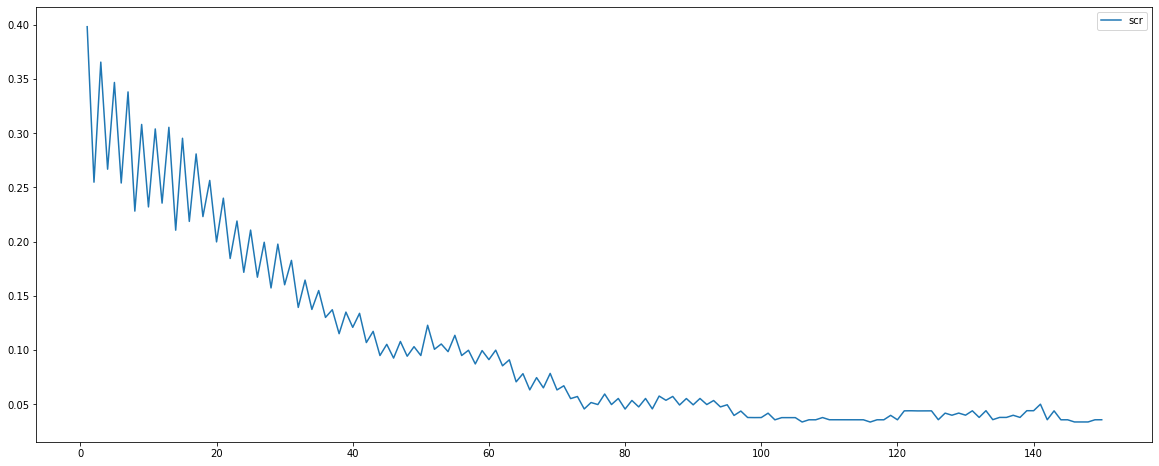

In [57]:
plt.figure(figsize = (20,8))
plt.plot(range(1,151), scr, label = 'scr')
plt.legend()
plt.show()

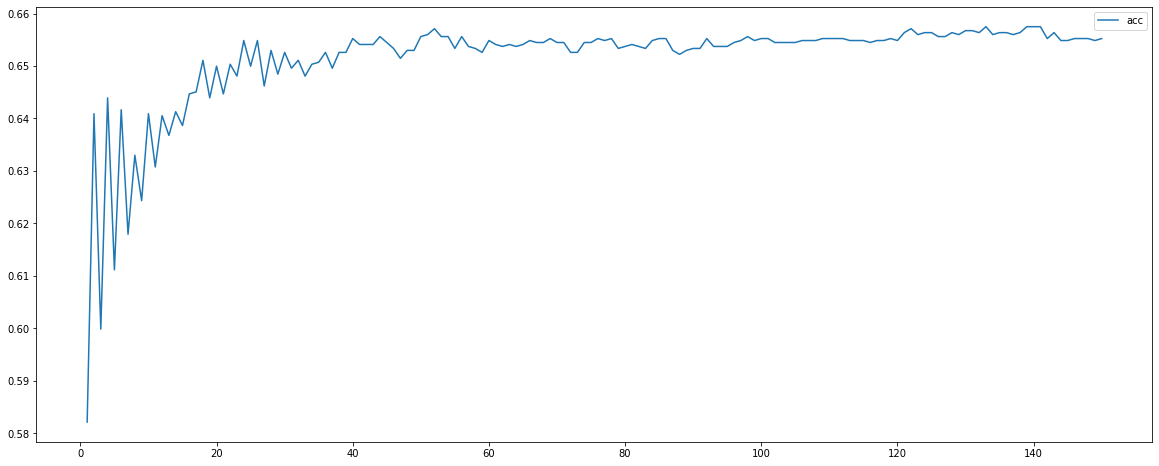

In [58]:
plt.figure(figsize = (20,8))
plt.plot(range(1,151), scr2, label = 'acc')
plt.legend()
plt.show()

In [59]:
knnc = KNNC(n_neighbors = 70)
knnc.fit(xtrain, ytrain)
knncPred = knnc.predict(xtest)
knncPred, knnc.score(xtest, ytest)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 0.6544837980406933)

In [60]:
lor = LOR()
lor.fit(xtrain, ytrain)
lorPred = lor.predict(xtest)
lorPred, lor.score(xtest, ytest)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 0.6571213262999246)

In [67]:
dtc = DTC()
dtc.fit(xtrain, ytrain)
dtcPred = dtc.predict(xtest)
dtcPred, dtc.score(xtest, ytest)

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64), 0.5998492840994725)

In [71]:
from statistics import mode

finalPred = []

for i in range(0, len(xtest)):
    finalPred.append(mode([knncPred[i], dtcPred[i], lorPred[i]]))

In [72]:
acc(ytest, finalPred)

0.6590052750565185

In [80]:
rfcScr = []

for i in range(1,51):
    rfc = RFC(max_depth = i)
    rfc.fit(xtrain, ytrain)
    rfcScr.append(rfc.score(xtest, ytest))

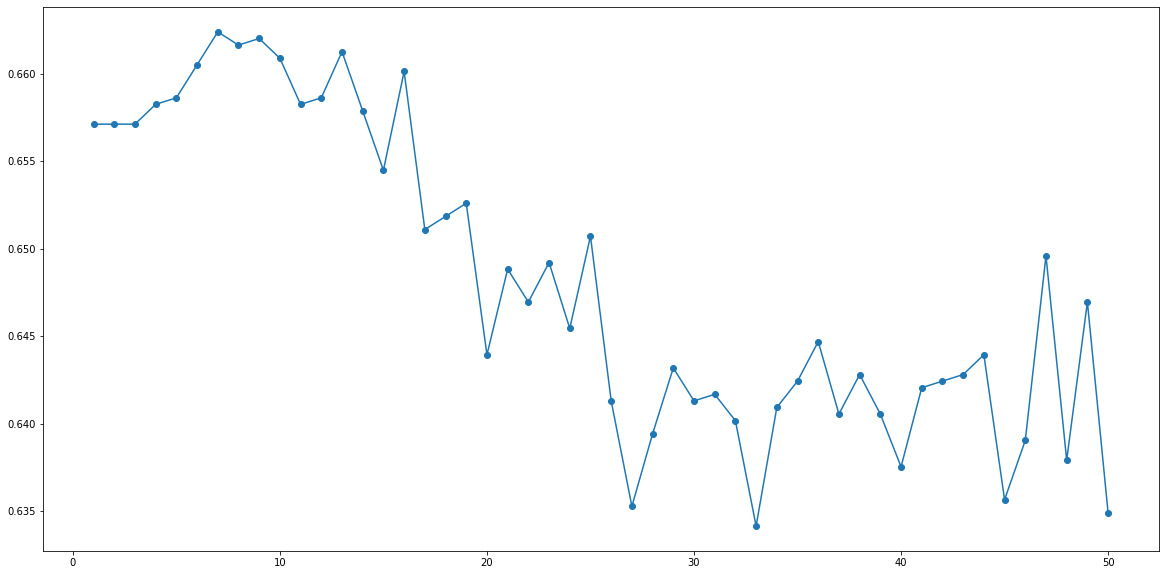

In [81]:
plt.figure(figsize = (20,10))
plt.plot(range(1,51), rfcScr, marker = 'o')
plt.show()

In [82]:
rfc = RFC(max_depth = 7)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
rfcPred = rfc.predict(xtest)
rfc.score(xtest, ytest)

0.6608892238131123

In [84]:
ras(ytest, rfc.predict_proba(xtest)[:,1])

0.6164983239237827

In [85]:
ras(ytrain, rfc.predict_proba(xtrain)[:,1])

0.7305158806439925